In [23]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [24]:
E = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],[0.1,0.1,0.1,0.1,0.1,0.5]])
A = np.array([[0.95,0.05],[0.1,0.9]])
s = np.array([2/3,1/3])
L = 300
M = 2 #number of states
K = 6 #number of possible emissions

In [25]:
#случайная последовательность при заданных параметрах E и A
def HMM(E, A, L):
    Path = np.zeros((L,), dtype=int)
    vec_sost = np.zeros((L,), dtype=int)

    #Случайным образом выбирается стратегия игры (d=0 fair P=2/3, d=1 unfair P=1/3)
    d_rand = np.random.random()
    if d_rand <= s[0]: d = 0
    else: d = 1
    vec_sost[0] = d
    
    if vec_sost[0] == 0:
        Path[0] = np.random.randint(1, 6)
    elif vec_sost[0] == 1:
        e_rand = np.random.random()
        if e_rand < 0.5:
            Path[0] = 6
        else:
            Path[0] = np.random.randint(1, 5)
    
    for i in range(1,L):
        a_rand = np.random.random()
        if (d == 0) and (a_rand <= 0.05): d = 1
        elif (d == 1) and (a_rand <= 0.1): d = 0
        
        if d == 0:
            vec_sost[i] = 0
            Path[i] = np.random.randint(1, 6)
        elif d == 1:
            vec_sost[i] = 1
            e_rand = np.random.random()
            if e_rand >= 0.5:
                Path[i] = 6
            else:
                Path[i] = np.random.randint(1, 5)
    return(Path, vec_sost)


Path, vec_sost = HMM(E, A, L)

print("Наблюдения:", Path, "Состояния: ", vec_sost, sep = '\n')

Наблюдения:
[3 5 4 4 5 5 1 5 4 3 3 3 2 4 5 4 2 2 3 4 1 4 1 6 2 2 5 1 5 1 5 3 1 5 1 4 2
 5 1 4 5 4 3 1 3 6 1 6 2 6 3 4 4 2 1 4 1 2 5 3 6 1 2 6 6 6 6 2 2 3 6 6 6 1
 3 5 4 2 2 3 4 3 4 3 2 3 5 2 3 4 3 5 2 4 5 3 3 1 2 3 5 3 5 3 4 2 2 2 3 4 2
 3 4 1 4 3 2 5 1 1 1 3 6 6 6 3 3 4 2 5 5 4 6 3 6 6 6 2 6 2 3 1 2 2 6 6 3 4
 2 5 4 1 2 2 1 1 3 3 2 4 5 4 3 2 1 5 4 4 3 5 6 6 1 3 1 2 4 4 3 4 2 5 5 2 4
 5 3 6 4 1 3 5 3 5 4 3 1 1 2 1 2 2 6 3 3 2 5 5 4 3 3 2 3 1 1 1 3 3 3 1 5 4
 2 2 3 1 2 1 1 5 4 2 5 5 2 2 1 1 1 3 2 5 4 5 3 5 5 1 4 3 3 3 1 2 4 5 2 3 4
 5 4 2 1 5 2 3 2 3 2 2 3 4 2 3 4 4 5 2 5 1 5 5 5 2 3 2 1 4 1 4 2 4 3 5 5 4
 1 4 4 5]
Состояния: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0

# Viterbi

In [26]:
def viterby (Path, A,E):
    V_matr = np.zeros((2, L))
    P_matr = [[],[]]

    V_matr[0][0] = s[0]*E[0][Path[0]-1]
    V_matr[1][0] = s[1]*E[1][Path[0]-1]

    for i in range (1,L):
        for j in range(2):
            V_matr[j][i] = E[j][Path[i]-1]*max(A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1])
            P_matr[j].append(np.argmax([A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1]]))
    P_matr = np.array(P_matr)
    
    P_vec = np.zeros(L)
    P_vec[-1] = np.argmax([V_matr[0][-1],V_matr[1][-1]])
    for i in range(L-2,-1,-1):
        P_vec[i] = P_matr[int(P_vec[i+1])][i]
    return(P_vec)


def translation(l):
    L = len(l)
    c = ''
    dec = {0:'F', 1:'L'}
    for i in range(L):
        if l[i]!=-1:
            c += dec[l[i]]
        else:
            c += "o"
    return c

P_vec = viterby (Path, A,E)

summ=0
for i in range(L):
    if translation(vec_sost)[i] == translation(P_vec)[i]:
        summ+=1
print('\nЧастота совпадения:', summ/L)


print(translation(vec_sost),"_"*100, translation(P_vec), sep='\n')


Частота совпадения: 0.87
FFFFFFFFFFFFFFFFFLLLLFFLLFFFFFFFFFFFFFFFFFFFLLLLLLFFFFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLFFFFFFFLLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFLLLFFFFFFFFFFFFFFLFFFFFFFFFFFFFFLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
____________________________________________________________________________________________________
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF


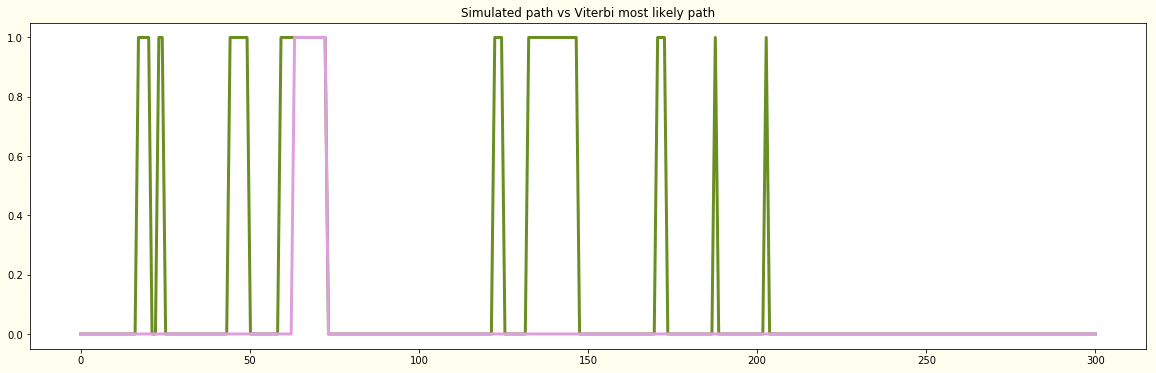

In [27]:
x = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(20, 6),facecolor="ivory")
ax.plot(x, vec_sost, ls ='-', color = 'olivedrab',linewidth = 3)
ax.plot(x, P_vec, ls ='-', color = 'plum',linewidth = 3)
plt.title('Simulated path vs Viterbi most likely path')
plt.show()

# Forward

In [ ]:
'''FV_matr = np.zeros((2, L))
m_F = np.zeros(L)
FV_matr[0][0] = 1
FV_matr[1][0] = 1
FV_matr[0][1] = E[0][Path[0]-1]*s[0]
FV_matr[1][1] = E[1][Path[0]-1]*s[1]

for i in range (2,L):
    for j in range(2):        
        FV_matr[j][i] = E[j][Path[i-1]-1]*(A[0][j]*FV_matr[0][i-1] + A[1][j]*FV_matr[1][i-1])
forw_prob = FV_matr[-1].sum()
    
    
        
#F_res = FV_matr[0][-1]*A[0][0] + FV_matr[1][-1]*A[1][0]
F_res = FV_matr[0][-1] + FV_matr[1][-1]
print(F_res)
'''

In [28]:
def forward(Path, s, A, E):
    forw = np.zeros((L, 2))
    forw[0] = s*E[:,Path[0]-1]
    for l in range(1, L):
        forw[l] = np.dot(forw[l-1],A) * E[:, Path[l]-1]
    forw_prob = forw[-1].sum()
    return forw, forw_prob

# Backward

In [ ]:
'''BV_matr = np.zeros((2, L))
m_b = np.zeros(L)
#BV_matr[0][-1]=A[0][0]
#BV_matr[1][-1]=A[1][0]
BV_matr[0][-1]=1
BV_matr[1][-1]=1
for i in range (L-2,-1,-1):
    for j in range(2):
        BV_matr[j][i] = A[j][0]*E[0][Path[i]-1]*BV_matr[0][i+1]+A[j][1]*E[1][Path[i]-1]*BV_matr[1][i+1]
back_prob = np.sum(s * E[:, Path[0]-1] * BV_matr[:,0])    
    
    
B_res = BV_matr[0][0]*s[0] + BV_matr[1][0]*s[1]
#B_res = A[0][0]*E[0][Path[0]-1]*BV_matr[0][0] + A[0][1]*E[1][Path[0]-1]*BV_matr[1][0]
print(B_res)
'''

In [29]:
def backward(Path, s, A, E):
    back = np.zeros((2,L))
    back[:,-1:] = 1
    for l in reversed(range(L-1)):
        for m in range(2):
            back[m,l] = np.sum(back[:,l+1] * A[m,:] * E[:,Path[l+1]-1])
    back_prob = np.sum(s * E[:, Path[0]-1] * back[:,0])
    return back, back_prob

In [30]:
forw, forw_prob = forward(Path, s, A, E)
back, back_prob = backward(Path, s, A, E)
print(forw_prob,back_prob)

6.534468344167232e-237 6.534468344167246e-237


In [31]:
#Апостериорное дешифрование
posterior_prob = np.multiply(forw, back.T) / forw_prob
posterior_prob[:5]

array([[0.93291423, 0.06708577],
       [0.95514472, 0.04485528],
       [0.96751897, 0.03248103],
       [0.9744068 , 0.0255932 ],
       [0.97824054, 0.02175946]])

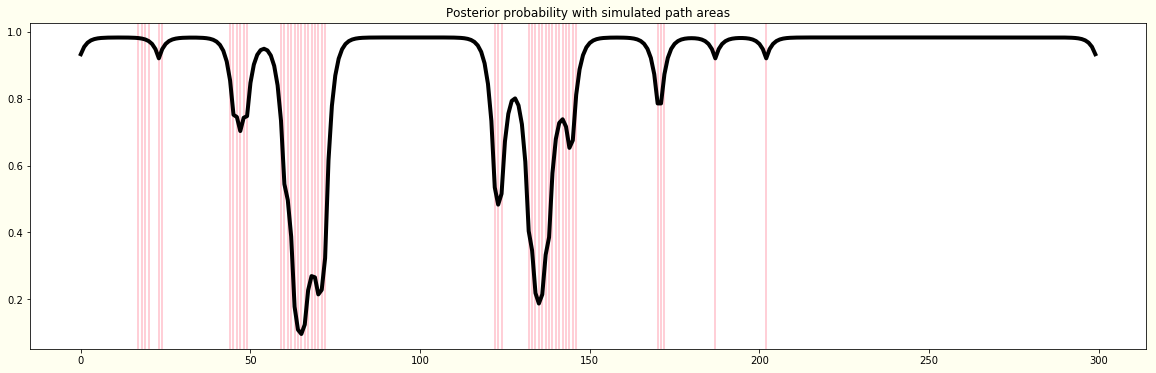

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6),facecolor="ivory")
for i in range(L):
    if vec_sost[i] == 0:
        plt.axvline(x = i, color = 'white')
    else:
        plt.axvline(x = i, color = 'pink')
plt.plot(range(L), posterior_prob[:,0], color = 'black', linewidth = 4)
plt.title('Posterior probability with simulated path areas')
plt.show()

In [33]:
#initialization (assign random values)
s_new = np.array([12/13, 1/13])
A_new = np.array([[0.1, 0.9],
                  [9/15, 6/15]])
E_new = np.array([[0.1, 0.2, 0.3, 0.3, 0.05, 0.05],
                  [0.1, 0.1, 0.25, 0.25, 0.2, 0.1]])

In [34]:
dices = [0, 1]
score = [0, 1, 2, 3, 4, 5]
hidden_sequence_new, observed_sequence_new = np.zeros(L, dtype=np.int), np.zeros(L, dtype=np.int)
hidden_sequence_new[0] = np.random.choice(dices, 1, p = s)
for i in range(1, L):
    hidden_sequence_new[i] = np.random.choice(dices, 1, p = A_new[int(hidden_sequence_new[i-1])])
    observed_sequence_new[i] = np.random.choice(score, 1, p = E_new[int(hidden_sequence_new[i-1])])

In [35]:
hidden_sequence_new

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [36]:
observed_sequence_new

array([0, 1, 1, 2, 1, 0, 3, 3, 0, 3, 0, 1, 2, 5, 5, 2, 2, 0, 1, 3, 4, 1,
       1, 5, 2, 2, 0, 4, 0, 0, 0, 1, 2, 4, 3, 2, 1, 2, 3, 1, 0, 3, 0, 1,
       3, 2, 2, 1, 2, 3, 2, 3, 0, 2, 3, 0, 3, 4, 2, 2, 2, 1, 2, 2, 3, 1,
       3, 1, 3, 5, 3, 5, 0, 0, 2, 3, 1, 1, 0, 3, 4, 0, 1, 3, 3, 4, 2, 2,
       2, 1, 3, 5, 3, 0, 0, 1, 2, 1, 2, 3, 3, 1, 0, 4, 2, 4, 2, 2, 3, 4,
       1, 2, 2, 0, 2, 2, 3, 4, 5, 2, 3, 2, 1, 2, 4, 4, 5, 3, 2, 2, 1, 5,
       2, 2, 0, 2, 3, 3, 3, 1, 1, 3, 3, 3, 4, 3, 0, 5, 2, 1, 3, 4, 2, 1,
       3, 4, 4, 4, 4, 2, 2, 4, 3, 3, 1, 3, 2, 2, 4, 3, 4, 3, 3, 2, 2, 3,
       2, 3, 2, 1, 2, 4, 2, 3, 3, 4, 4, 5, 0, 1, 4, 5, 0, 3, 3, 1, 0, 2,
       3, 1, 2, 0, 4, 2, 4, 4, 1, 3, 3, 5, 3, 0, 0, 3, 3, 3, 4, 5, 4, 3,
       0, 1, 1, 5, 2, 2, 2, 2, 3, 3, 4, 5, 3, 3, 2, 3, 2, 3, 3, 3, 5, 2,
       2, 1, 3, 1, 4, 2, 1, 2, 3, 3, 5, 0, 1, 2, 3, 4, 3, 3, 2, 0, 3, 4,
       4, 2, 3, 2, 3, 0, 3, 0, 2, 3, 5, 4, 3, 1, 4, 3, 3, 3, 2, 3, 4, 3,
       1, 4, 0, 2, 2, 5, 1, 5, 3, 2, 3, 4, 2, 1])

In [37]:
#forward algorithm for sequence x (observed_sequence_new)
forw_new, forw_prob_new = forward(observed_sequence_new, s_new, A_new, E_new)
back_new, back_prob_new = backward(observed_sequence_new, s_new, A_new, E_new)
print(back_prob_new,forw_prob_new)

2.9142563789746924e-237 2.9142563789746945e-237


In [38]:
#parameter for transition matrix
def model_param_a(trans, emis):
    forw_new, forw_prob_new = forward(observed_sequence_new, s_new, trans, emis)
    back_new = backward(observed_sequence_new, s_new, trans, emis)[0]
    A_matr = np.zeros((M, M))
    a_matr = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            for k in range(1, L - 1):
                A_matr[i, j] += forw_new[k, i] * trans[i, j] * emis[j, observed_sequence_new[k] - 1] * back_new[j, k + 1]
    A_matr = A_matr / forw_prob_new
    for i in range(M):
        for j in range(M):
            a_matr[i, j] = A_matr[i, j] / np.sum(A_matr[i])
    return a_matr

In [39]:
model_param_a(A_new, E_new)

array([[0.12246366, 0.87753634],
       [0.61087307, 0.38912693]])

In [41]:
#a0 = transition_matrix_new
a0 = np.zeros((M, M))
a1 = model_param_a(A_new, E_new)
print('Transition matrix A: ',a1,sep='\n')

Transition matrix A: 
[[0.12246366 0.87753634]
 [0.61087307 0.38912693]]


In [42]:
#parameter for emission matrix
def model_param_e(trans, emis):
    E = np.zeros((M, K))
    e = np.zeros((M, K))
    for i in range(M):
        for j in range(K):
            for k in range(L):
                if observed_sequence_new[k] == j + 1:
                    E[i, j] += forw_new[k, i] * back_new[i, k]
    for i in range(M):
        for j in range(K):
            e[i, j] = E[i, j] / np.sum(E[i])
    return e

In [43]:
#e0 = emission_matrix_new
e0 = np.zeros((M, K))
e1 = model_param_e(A_new, E_new)
print('Emission matrix E: ', e1,sep='\n')

Emission matrix E: 
[[0.14812673 0.35752761 0.31731242 0.15170073 0.02533251 0.        ]
 [0.18584331 0.22793262 0.3167362  0.15038348 0.1191044  0.        ]]
